In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



---


# **Proyecto Final:**

**Introducción**

El estado de Nueva York, siendo el hogar de la ciudad homónima, constituye un destino turístico de renombre mundial, recibiendo anualmente a cerca de 50 millones de visitantes, tanto nacionales como internacionales. Su posición como epicentro cultural, gastronómico y económico lo convierte en un lugar estratégico para el establecimiento y éxito de negocios, particularmente en la industria restaurantera.


**Contexto y Potencial del Mercado**

Nueva York es reconocida por su diversidad cultural y oferta gastronómica, lo que la convierte en un imán para los amantes de la buena comida y los exploradores de nuevas experiencias culinarias. Esta demanda constante por experiencias gastronómicas de calidad crea un entorno favorable para el establecimiento y crecimiento de restaurantes que ofrezcan no solo excelencia culinaria, sino también un servicio impecable y una atmósfera acogedora.


**Propuesta de Valor para Restaurantes**

En este contexto, los restaurantes en el estado de Nueva York deben enfocarse en ofrecer una propuesta de valor diferenciada que se base en los siguientes pilares:

Excelencia en la Atención al Cliente: Un servicio al cliente excepcional es fundamental para diferenciarse en un mercado tan competitivo. El personal debe estar capacitado para ofrecer una atención personalizada, amable y eficiente que eleve la experiencia del cliente a un nivel memorable.

Calidad de Producto y Cocina Innovadora: La calidad de los ingredientes y la creatividad en la cocina son aspectos esenciales para destacarse en el mercado gastronómico de Nueva York. Los restaurantes deben ofrecer platos únicos, preparados con ingredientes frescos y de la más alta calidad, que sorprendan y deleiten a los comensales.

Instalaciones y Ambiente Atractivos: El ambiente y diseño del restaurante son clave para crear una experiencia completa para el cliente. Las instalaciones deben ser cómodas, elegantes y acogedoras, con una ambientación que refleje la identidad del restaurante y invite a los clientes a disfrutar de una experiencia memorable.

**Conclusiones y Recomendaciones**

En conclusión, el estado de Nueva York ofrece un entorno propicio para el establecimiento y crecimiento de restaurantes que buscan destacarse en un mercado exigente y competitivo. Para tener éxito en este contexto, los restaurantes deben centrarse en ofrecer una experiencia integral que combine excelencia en el servicio, calidad en la cocina y un ambiente atractivo y acogedor.

Además, es fundamental realizar un análisis detallado del mercado y la competencia, identificar las necesidades y preferencias de los clientes y adaptarse de manera continua a las tendencias y cambios en el mercado gastronómico.

En resumen, el estado de Nueva York ofrece oportunidades únicas para emprendedores y empresarios en la industria restaurantera, y aquellos que logren ofrecer una propuesta de valor diferenciada y satisfacer las necesidades del exigente mercado neoyorquino tendrán la posibilidad de alcanzar el éxito y destacarse en este vibrante y competitivo entorno.

Debido a todo lo detallado con anterioridad, como grupo. hemos decidido basar el informe enfocandonos en los 'Restaurantes' del Estado de Nueva York.




---



---
## **ETL_EDA Google Maps Metadata_Sitios:**


---



---



## **Importar Librerias:**

In [1]:
# Importar librerias necesarias
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from pandas import json_normalize
from wordcloud import WordCloud
import datetime

Cargamos e importamos las librerias que concideramos necesarias para el desarrollo del proyecto.



---
## **Cargar los archivos .JSON:**


In [2]:
# Crear desde el  archivo JSON en un DataFrarame
data_folder = 'C:/Users/flore/OneDrive/Desktop/GRUPAL HENRY/google/metadatos'
file_names_to_read = ['1.json', '2.json', '3.json', '4.json']
rows = []

for filename in file_names_to_read:
    file_path = os.path.join(data_folder, filename)
    with open(file_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                rows.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {filename}: {e}")

google_metada_sitios_1_4 = pd.DataFrame(rows)

In [3]:
# Visualizacion general de las variables y cantidad de entradas
google_metada_sitios_1_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100004 entries, 0 to 1100003
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   name              1099983 non-null  object 
 1   address           1062401 non-null  object 
 2   gmap_id           1100004 non-null  object 
 3   description       59044 non-null    object 
 4   latitude          1100004 non-null  float64
 5   longitude         1100004 non-null  float64
 6   category          1091716 non-null  object 
 7   avg_rating        1100004 non-null  float64
 8   num_of_reviews    1100004 non-null  int64  
 9   price             60509 non-null    object 
 10  hours             775726 non-null   object 
 11  MISC              798733 non-null   object 
 12  state             790032 non-null   object 
 13  relative_results  966389 non-null   object 
 14  url               1100004 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage:

In [4]:
# Crear una variable de restaurantes en el estado de 'Nueva York'
restaurantes_ny_1 = google_metada_sitios_1_4[google_metada_sitios_1_4['address'].str.contains('NY', na=False)]

In [5]:
restaurantes_ny_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59807 entries, 58 to 1099946
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              59807 non-null  object 
 1   address           59807 non-null  object 
 2   gmap_id           59807 non-null  object 
 3   description       4148 non-null   object 
 4   latitude          59807 non-null  float64
 5   longitude         59807 non-null  float64
 6   category          59402 non-null  object 
 7   avg_rating        59807 non-null  float64
 8   num_of_reviews    59807 non-null  int64  
 9   price             4263 non-null   object 
 10  hours             42757 non-null  object 
 11  MISC              42940 non-null  object 
 12  state             43464 non-null  object 
 13  relative_results  53598 non-null  object 
 14  url               59807 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 7.3+ MB


In [6]:
# Eliminar la variable que no se va a utilizar
del google_metada_sitios_1_4

In [7]:
# Crear desde el  archivo JSON en un DataFrarame
data_folder = 'C:/Users/flore/OneDrive/Desktop/GRUPAL HENRY/google/metadatos'
file_names_to_read = ['5.json', '6.json', '7.json', '8.json']
rows = []

for filename in file_names_to_read:
    file_path = os.path.join(data_folder, filename)
    with open(file_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                rows.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {filename}: {e}")

google_metada_sitios_5_9 = pd.DataFrame(rows)

In [8]:
# Visualizacion general de las variables y cantidad de entradas
google_metada_sitios_5_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100004 entries, 0 to 1100003
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   name              1099994 non-null  object 
 1   address           1072629 non-null  object 
 2   gmap_id           1100004 non-null  object 
 3   description       97925 non-null    object 
 4   latitude          1100004 non-null  float64
 5   longitude         1100004 non-null  float64
 6   category          1094313 non-null  object 
 7   avg_rating        1100004 non-null  float64
 8   num_of_reviews    1100004 non-null  int64  
 9   price             104702 non-null   object 
 10  hours             818930 non-null   object 
 11  MISC              857095 non-null   object 
 12  state             834709 non-null   object 
 13  relative_results  997020 non-null   object 
 14  url               1100004 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage:

In [9]:
# Crear una variable de restaurantes en el estado de 'Nueva York'
restaurantes_ny_2 = google_metada_sitios_5_9[google_metada_sitios_5_9['address'].str.contains('NY', na=False)]

In [10]:
restaurantes_ny_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60195 entries, 123 to 1099870
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              60195 non-null  object 
 1   address           60195 non-null  object 
 2   gmap_id           60195 non-null  object 
 3   description       6294 non-null   object 
 4   latitude          60195 non-null  float64
 5   longitude         60195 non-null  float64
 6   category          59906 non-null  object 
 7   avg_rating        60195 non-null  float64
 8   num_of_reviews    60195 non-null  int64  
 9   price             7117 non-null   object 
 10  hours             45215 non-null  object 
 11  MISC              46250 non-null  object 
 12  state             45997 non-null  object 
 13  relative_results  55303 non-null  object 
 14  url               60195 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 7.3+ MB


In [11]:
del google_metada_sitios_5_9

In [12]:
# Crear desde el  archivo JSON en un DataFrarame
data_folder = 'C:/Users/flore/OneDrive/Desktop/GRUPAL HENRY/google/metadatos'
file_names_to_read = ['9.json','10.json', '11.json']
rows = []

for filename in file_names_to_read:
    file_path = os.path.join(data_folder, filename)
    with open(file_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                rows.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {filename}: {e}")

google_metada_sitios_9_11 = pd.DataFrame(rows)

In [13]:
# Visualizacion general de las variables y cantidad de entradas
google_metada_sitios_9_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825003 entries, 0 to 825002
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              824997 non-null  object 
 1   address           809470 non-null  object 
 2   gmap_id           825003 non-null  object 
 3   description       97320 non-null   object 
 4   latitude          825003 non-null  float64
 5   longitude         825003 non-null  float64
 6   category          821563 non-null  object 
 7   avg_rating        825003 non-null  float64
 8   num_of_reviews    825003 non-null  int64  
 9   price             109992 non-null  object 
 10  hours             642950 non-null  object 
 11  MISC              678349 non-null  object 
 12  state             653815 non-null  object 
 13  relative_results  766544 non-null  object 
 14  url               825003 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 94.4+ MB


In [14]:
# Crear una variable de restaurantes en el estado de 'Nueva York'
restaurantes_ny_3 = google_metada_sitios_9_11[google_metada_sitios_9_11['address'].str.contains('NY', na=False)]

In [15]:
restaurantes_ny_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44000 entries, 144 to 825000
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              44000 non-null  object 
 1   address           44000 non-null  object 
 2   gmap_id           44000 non-null  object 
 3   description       6372 non-null   object 
 4   latitude          44000 non-null  float64
 5   longitude         44000 non-null  float64
 6   category          43849 non-null  object 
 7   avg_rating        44000 non-null  float64
 8   num_of_reviews    44000 non-null  int64  
 9   price             7652 non-null   object 
 10  hours             34817 non-null  object 
 11  MISC              35770 non-null  object 
 12  state             35271 non-null  object 
 13  relative_results  41332 non-null  object 
 14  url               44000 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 5.4+ MB


In [16]:
del google_metada_sitios_9_11

In [17]:
# Crear una variable de restaurantes en el estado de 'Nueva York'
comercios_ny = pd.concat([restaurantes_ny_1, restaurantes_ny_2, restaurantes_ny_3], ignore_index=True)

In [18]:
del restaurantes_ny_1, restaurantes_ny_2, restaurantes_ny_3

 **Observaciones:**

 - Realizamos las cargas de los archivos .Json que obtuvimos de los dataset brindados de Google Maps Metadata, los cuales era un total de 11.

 - Se eliminaron todos los registros que no corresponden al Estado de Nueva York, porque no seran tenidos en cuenta para el analisis de nuestro objetivo. Dejando un DataFrame mas acotado con los registros necesarios para mejorar la respuesta.

 - Fueron leidos y guardados por partes en Dataframe, para evitar problemas en el cargado, para luego unirlos con el codigo de concatenacion para que el resultado sea un DataFrame con el total de los datos brindados.

 - Se creo un DataFrame que contiene el total de comercios de la ciudad de Nueva York.




---



---
## **Visualizacion Genral del DataFrame:**


In [19]:
# Observar el tipo de variable y cantidad de entradas
comercios_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164002 entries, 0 to 164001
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              164002 non-null  object 
 1   address           164002 non-null  object 
 2   gmap_id           164002 non-null  object 
 3   description       16814 non-null   object 
 4   latitude          164002 non-null  float64
 5   longitude         164002 non-null  float64
 6   category          163157 non-null  object 
 7   avg_rating        164002 non-null  float64
 8   num_of_reviews    164002 non-null  int64  
 9   price             19032 non-null   object 
 10  hours             122789 non-null  object 
 11  MISC              124960 non-null  object 
 12  state             124732 non-null  object 
 13  relative_results  150233 non-null  object 
 14  url               164002 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 18.8+ MB


In [20]:
# Visualizar los 5 primeros resgistros
comercios_ny.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,A-Top Insurance,"A-Top Insurance, 1009 Brighton Beach Ave, Broo...",0x89c24469c758686b:0x641f5b84cb9bedfa,None,40.578254,-73.959127,"[Insurance broker, Insurance agency]",2.0,4,None,"[[Thursday, 10AM–6PM], [Friday, 10AM–6PM], [Sa...",None,Open ⋅ Closes 6PM,"[0x89c24449907718fb:0x31b554a0983f621d, 0x4065...",https://www.google.com/maps/place//data=!4m2!3...
1,T-Mobile,"T-Mobile, 3923 103rd St, Queens, NY 11368",0x89c25fc9494dce47:0x6d63c807b59a55,None,40.750146,-73.862536,"[Cell phone store, Electronic parts supplier, ...",3.5,95,$$,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...","{'Service options': ['In-store shopping', 'Del...",Open ⋅ Closes 8PM,"[0x89c25fc7a91c609f:0xb103d6a261373fd, 0x89c25...",https://www.google.com/maps/place//data=!4m2!3...
2,Ace Hardware,"Ace Hardware, 130 4th Ave, New York, NY 10003",0x89c259992463b6e1:0x4a601a43752541dd,"Chain retailer stocking household tools, suppl...",40.733182,-73.990201,"[Hardware store, Building materials store, Ele...",3.4,8,None,"[[Thursday, 8AM–6:30PM], [Friday, 8AM–6:30PM],...",None,Permanently closed,"[0x89c2598340fb6509:0xa996f3db49ba6e78, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
3,"Agricultural Consulting Services, Inc.","Agricultural Consulting Services, Inc., 370 Su...",0x89d14bf74320aea5:0x720261cd8960f8cd,None,43.054743,-77.649136,[Corporate office],3.0,1,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",None,Open ⋅ Closes 5PM,None,https://www.google.com/maps/place//data=!4m2!3...
4,Long Point,"Long Point, Ledyard, NY 13026",0x89d0bd8d2df8d10f:0x77a8f349f40492fa,None,42.715626,-76.710227,[Peninsula],5.0,1,None,None,None,None,None,"https://www.google.com/maps/place/Ledyard,+NY+..."


De esta manera comenzamos con el primer acercamientos a los Datos, observando desde las cantidad de Registros (164002) y con un total 15 columnas. Podemos ver las tipo de variables que forman el DataFrame, de manera que nos orientamos acerca del analisis y los datos que disponemos.

---

## **Descripcion de las columnas:**

In [21]:
# Se buscan los nombres de las columnas
comercios_ny.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

- name: Nombre del Comercio
- gmap_id: Identificador de Google Maps
- address: Direccion
- description: Detalles de la actividad del comercio
- latitude: Latidud
- longitude: Longitud
- category: Categoria del Comercio
- avg_rating: Promedio de Calificacion
- num_of_reviews: Numeros de Comentarios
- price: Precio
- hours: Horario de Apertura y Cierre
- MISC: Caracteriscticas opcionales de las instalaciones
- state: Estado en el que se encuentra el comercio (ej: Abre en un momento)
- relative_results:
- url: Direccion de Google Maps del Comercio

Generamos una Lista con el nombre de las columnas y el informe del contenido de las mismas, para tener de guia en el moento del analisis.



---
## **Cuantificar Valores Nulos:**


Procedemos a identificar la cantidad de valores nulos, como su porcentaje, tanto del total del dataframe como el de cada columna en particular. Esto ayuda para luego tomar una descision sobre los mismos.

In [22]:
# Verificar si cada fila tiene todos los valores nulos
filas_con_nulos = comercios_ny.isna().all(axis=1).sum()
# Mostrar las filas que tienen todos los valores nulos
print(f'Cantidad de Filas con todos Valores Nulos: {filas_con_nulos}')

Cantidad de Filas con todos Valores Nulos: 0


In [23]:
# Cantidad total de valores nulos en todo el DataFrame
total_valores_nulos_dataframe = comercios_ny.isna().sum().sum()
print(f' Total de Valores nulos del DataFrame: {total_valores_nulos_dataframe}')

 Total de Valores nulos del DataFrame: 426297


In [24]:
# Total de celdas en el DataFrame
total_celdas = comercios_ny.size
print(f' Total de las celdas DataFrame: {total_celdas}')

 Total de las celdas DataFrame: 2460030


In [25]:
# Calcula el porcentaje total de valores nulos
porcentaje_total_valores_nulos_dataframe = (total_valores_nulos_dataframe / total_celdas) * 100
# Muestra el porcentaje total de valores nulos
print(f'Porcentaje total de valores nulos en el DataFrame: {round(porcentaje_total_valores_nulos_dataframe, 2)}%')

Porcentaje total de valores nulos en el DataFrame: 17.33%


In [26]:
# Cantidad de Valores Nulos por columna
total_valores_nulos = comercios_ny.isna().sum()
total_valores_nulos

name                     0
address                  0
gmap_id                  0
description         147188
latitude                 0
longitude                0
category               845
avg_rating               0
num_of_reviews           0
price               144970
hours                41213
MISC                 39042
state                39270
relative_results     13769
url                      0
dtype: int64

In [27]:
# Cantidad de valores nulos en cada columna
total_valores_nulos = comercios_ny.isna().sum()
# Porcentaje de valores nulos en cada columna
porcentaje_valores_nulos = (total_valores_nulos / len(comercios_ny)) * 100
# Mostrar los porcentajes por columnas
print(porcentaje_valores_nulos)

name                 0.000000
address              0.000000
gmap_id              0.000000
description         89.747686
latitude             0.000000
longitude            0.000000
category             0.515238
avg_rating           0.000000
num_of_reviews       0.000000
price               88.395263
hours               25.129572
MISC                23.805807
state               23.944830
relative_results     8.395629
url                  0.000000
dtype: float64


**Observaciones:**

- Se destacan las columnas 'description' y 'price' con un gran porcentaje de valores nulos.



---
## **Eliminar Columnas:**

Tomamos la decision de elegir cuales columnas seran necesarias para nuestro analisis, para hacer mas efectivo el trabajo.

In [28]:
# Se eliminan las columnas que no seran utilizadas para el analisis
comercios_ny = comercios_ny.drop(columns=['description', 'state', 'relative_results', 'url'])

**Observaciones:**

- Eliminamos las columnas 'address', 'description', 'num_of_reviews', 'state', 'relative_results', 'url' debido a que no proporcionan informacion relevante para el analisis o poseen valores que se encuentran en otras.



---

## **Modificar el contenido de las Columnas:**



Alteramos los tipos de variables para poder mejorar el procesamiento y las consultas correspondientes.

In [29]:
# Se moifican  las listas en cadenas de str para poder tratar los datos dentro de ellas
comercios_ny['category'] = comercios_ny['category'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


In [30]:
# Se transforman a minusculas para que se pueda realizar una busqueda mas precisa por categoria
comercios_ny['category'] = comercios_ny['category'].str.lower()

In [31]:
# Rellenar los valores NA con una cadena vacía
comercios_ny['category'].fillna('sin categoria', inplace=True)
# Seleccionar las filas que contienen la palabra restaurant
restaurantes_ny = comercios_ny[comercios_ny['category'].str.contains('restaurant', case=False)]


In [32]:
# Convertir listas de la columna 'hours' en cadenas de texto
def convertir_a_cadena(x):
    if x is None:
        return None
    else:
        return ', '.join([day + ' ' + time for day, time in x])

# Aplicar la función a la columna 'hours'
restaurantes_ny['hours'] = restaurantes_ny['hours'].apply(convertir_a_cadena)

# Verificar los cambios
print(restaurantes_ny['hours'])


40        Thursday 6AM–7PM, Friday 6AM–7PM, Saturday 6AM...
51                                                     None
65        Thursday 11AM–9:30PM, Friday 11AM–9:30PM, Satu...
77        Thursday 8AM–3AM, Friday 8AM–3AM, Saturday 8AM...
94                                                     None
                                ...                        
163956    Monday 12–9PM, Tuesday 12–9PM, Wednesday 12–9P...
163969    Monday 12–10PM, Tuesday 12–10PM, Wednesday 12–...
163971    Monday 11AM–1AM, Tuesday 11AM–1AM, Wednesday 1...
163990    Monday 12–10PM, Tuesday 12–10PM, Wednesday 12–...
163995    Monday Closed, Tuesday 10AM–11PM, Wednesday 10...
Name: hours, Length: 17462, dtype: object


C:\Users\flore\AppData\Local\Temp\ipykernel_12644\1547379256.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurantes_ny['hours'] = restaurantes_ny['hours'].apply(convertir_a_cadena)


La modificacoin de la columna 'hours' se encontraba con listas anidadas, por lo que decidimos procesarlas para que queden desanidadas asi poder acceder a los datos de manera mas rapida.

In [33]:
# Expandir el diccionario en la columna 'MISC' en nuevas columnas
misc_expandido = json_normalize(restaurantes_ny['MISC'])

Creamos un nuevo Dataframe con la columna 'MISC' que estaba en forma de ojeto json, de esta manera se normaliza y la forma clave-valor toma la forma de columnas las claves y el contenido de las celdas el valor.

In [34]:
# Reinicio de indices de ambos DataFrames
restaurantes_ny.reset_index(drop=True, inplace=True)
misc_expandido.reset_index(drop=True, inplace=True)

# Concatenar las nuevas columnas al DataFrame original
restaurantes_ny = pd.concat([restaurantes_ny, misc_expandido], axis=1)

In [35]:
restaurantes_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17462 entries, 0 to 17461
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               17462 non-null  object 
 1   address            17462 non-null  object 
 2   gmap_id            17462 non-null  object 
 3   latitude           17462 non-null  float64
 4   longitude          17462 non-null  float64
 5   category           17462 non-null  object 
 6   avg_rating         17462 non-null  float64
 7   num_of_reviews     17462 non-null  int64  
 8   price              8676 non-null   object 
 9   hours              15977 non-null  object 
 10  MISC               17333 non-null  object 
 11  Service options    17007 non-null  object 
 12  Highlights         5067 non-null   object 
 13  Popular for        10579 non-null  object 
 14  Accessibility      8559 non-null   object 
 15  Offerings          13261 non-null  object 
 16  Dining options     913

In [36]:
# Eliminar la columna 'MISC' si ya no la necesitas
restaurantes_ny.drop(columns=['MISC'], inplace=True)

Reiniciamos los valores de ambos DataFrame, para no tener inconvenientes a la hora de la union a traves del eje de las columnas, para asi contar con las nuevas columnas que estaban anidadas. debido a que contamos con toda la informacion, procedemos a eliminar la columna 'MISC' que ya no sera de utilidad.

In [37]:
restaurantes_ny.head()

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,...,Offerings,Dining options,Amenities,Atmosphere,Crowd,Payments,Planning,Health & safety,From the business,Health and safety
0,Dunkin',"Dunkin', 4008 Bell Blvd, Queens, NY 11361",0x89c261f60bdf13db:0x38da730e4687a97b,40.763985,-73.771430,"coffee shop, bagel shop, bakery, breakfast res...",3.5,8,$,"Thursday 6AM–7PM, Friday 6AM–7PM, Saturday 6AM...",...,"[Coffee, Comfort food, Happy hour drinks, Late...","[Breakfast, Lunch, Dessert]","[Good for kids, Wi-Fi]",[Casual],"[Family-friendly, Tourists]","[Debit cards, NFC mobile payments]",NaN,NaN,NaN,NaN
1,Raffaello Kosher Pizza,"Raffaello Kosher Pizza, 37 W 46th St, New York...",0x89c258ffaeaba947:0x8355860772a595a9,40.756872,-73.980427,restaurant,3.4,8,None,None,...,[Comfort food],"[Lunch, Dinner]",[Good for kids],[Casual],NaN,NaN,NaN,NaN,NaN,NaN
2,Casa Malinche,"Casa Malinche, 3078 Coney Island Ave, Brooklyn...",0x89c244427d3e2c19:0xc1dbf7d8e71d7201,40.581086,-73.960139,mexican restaurant,4.4,7,None,"Thursday 11AM–9:30PM, Friday 11AM–9:30PM, Satu...",...,NaN,NaN,[Good for kids],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kennedy's Chicken & Sandwiches,"Kennedy's Chicken & Sandwiches, 495 E 138th St...",0x89c2f5c3caef3fb5:0xb7f855503b4bc974,40.808010,-73.919617,fast food restaurant,3.7,8,None,"Thursday 8AM–3AM, Friday 8AM–3AM, Saturday 8AM...",...,[Quick bite],[Dessert],[Good for kids],[Casual],NaN,NaN,NaN,NaN,NaN,NaN
4,Cafe Kristall,"Cafe Kristall, 70 Mercer St, New York, NY 10012",0x89c2598eb0b90839:0x2b3c5161280e7169,40.722466,-74.000283,"cafe, restaurant",5.0,1,$$,None,...,[Healthy options],NaN,NaN,"[Casual, Cozy, Quiet]",NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
restaurantes_ny.columns

Index(['name', 'address', 'gmap_id', 'latitude', 'longitude', 'category',
       'avg_rating', 'num_of_reviews', 'price', 'hours', 'Service options',
       'Highlights', 'Popular for', 'Accessibility', 'Offerings',
       'Dining options', 'Amenities', 'Atmosphere', 'Crowd', 'Payments',
       'Planning', 'Health & safety', 'From the business',
       'Health and safety'],
      dtype='object')

In [39]:
columnas_convertir = ['Service options', 'Highlights', 'Popular for', 'Offerings',
                     'Dining options', 'Amenities', 'Atmosphere', 'Crowd',
                     'Planning', 'Payments', 'Health & safety', 'Accessibility',
                     'From the business', 'Health and safety']

# Aplica la función lambda a cada columna individualmente
for column in columnas_convertir:
    restaurantes_ny[column] = restaurantes_ny[column].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

A causa que las columnas obtenidas de la columna'MISC' se encuentran dentro de una lista, se procede a extraer los datos que poseen, con la iteracion y funcion generada.

In [43]:
# Se realiza modificacion el opcion de visualizacion de los dataframe
pd.set_option('display.max_columns', None)




---
## **Valores Duplicados:**


Constatamos si hay valores duplicados, debido a que estos alteran el resultado final.

In [40]:
# Contarlos los valores duplicados
duplicados = restaurantes_ny.duplicated().sum()
print(f'Cantidad de Valores duplicados: {duplicados}')

Cantidad de Valores duplicados: 90


In [41]:
# Encuentra las filas duplicadas en el DataFrame
filas_duplicadas = restaurantes_ny[restaurantes_ny.duplicated(keep=False)]

# Ordena el DataFrame por todas las columnas para que las filas duplicadas estén juntas
filas_duplicadas_ordenadas = filas_duplicadas.sort_values(by=list(filas_duplicadas.columns))

# Imprime todas las filas duplicadas ordenadas
filas_duplicadas_ordenadas


,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,...,Offerings,Dining options,Amenities,Atmosphere,Crowd,Payments,Planning,Health & safety,From the business,Health and safety
40,Aaron Sushi,"Aaron Sushi, 2545 Steinway St, Astoria, NY 11103",0x89c25f6a82c4a53b:0xa6197d8e648f3a60,40.766705,-73.912333,"japanese restaurant, asian fusion restaurant, ...",4.3,27,None,"Wednesday 11:30AM–11:30PM, Thursday 11:30AM–11...",...,"Halal food, Small plates","Lunch, Dinner, Dessert, Seating","Good for kids, High chairs, Restroom, Wi-Fi",NaN,Family-friendly,"Cash-only, Debit cards, Credit cards",Accepts reservations,NaN,NaN,NaN
130,Aaron Sushi,"Aaron Sushi, 2545 Steinway St, Astoria, NY 11103",0x89c25f6a82c4a53b:0xa6197d8e648f3a60,40.766705,-73.912333,"japanese restaurant, asian fusion restaurant, ...",4.3,27,None,"Wednesday 11:30AM–11:30PM, Thursday 11:30AM–11...",...,"Halal food, Small plates","Lunch, Dinner, Dessert, Seating","Good for kids, High chairs, Restroom, Wi-Fi",NaN,Family-friendly,"Cash-only, Debit cards, Credit cards",Accepts reservations,NaN,NaN,NaN
36,Academy at Coffee Project NY,"Academy at Coffee Project NY, 21-10 51st Ave, ...",0x89c259843cac85bb:0x1adda0f155f3145d,40.740942,-73.949338,"coffee roasters, breakfast restaurant, cafe, c...",4.7,18,None,"Wednesday 8:30AM–2:30PM, Thursday 8:30AM–2:30P...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Identifies as women-led,NaN
126,Academy at Coffee Project NY,"Academy at Coffee Project NY, 21-10 51st Ave, ...",0x89c259843cac85bb:0x1adda0f155f3145d,40.740942,-73.949338,"coffee roasters, breakfast restaurant, cafe, c...",4.7,18,None,"Wednesday 8:30AM–2:30PM, Thursday 8:30AM–2:30P...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Identifies as women-led,NaN
25,Admiral Craft Equipment Corp.,"Admiral Craft Equipment Corp., 800 Shames Dr, ...",0x89c280501e760d5d:0x1b1bb59f5357c175,40.775522,-73.557529,"manufacturer, restaurant supply store",3.0,18,None,"Wednesday 8:30AM–5PM, Thursday 8:30AM–5PM, Fri...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,月花坊 Moon Flower House,"月花坊 Moon Flower House, 5912 7th Ave, Brooklyn,...",0x89c24544dcba20d9:0x81b7791c2791231e,40.637223,-74.011716,hamburger restaurant,2.9,78,None,"Wednesday 12PM–1AM, Thursday 12PM–1AM, Friday ...",...,"Comfort food, Quick bite, Small plates",Dessert,Good for kids,Casual,NaN,NaN,NaN,Mask required,NaN,NaN
34,沈阳烧烤（Shen Yang Shao Kao BBQ）,"沈阳烧烤（Shen Yang Shao Kao BBQ）, 160-13 Northern ...",0x89c261ea0a628bdf:0xf4f6d988c912587d,40.762806,-73.804747,"restaurant, barbecue restaurant, chinese resta...",4.6,165,None,"Wednesday 11:30AM–11:30PM, Thursday 11:30AM–11...",...,Comfort food,"Lunch, Dinner","Good for kids, Wi-Fi",Casual,Family-friendly,"Debit cards, Credit cards",Accepts reservations,Mask required,NaN,NaN
124,沈阳烧烤（Shen Yang Shao Kao BBQ）,"沈阳烧烤（Shen Yang Shao Kao BBQ）, 160-13 Northern ...",0x89c261ea0a628bdf:0xf4f6d988c912587d,40.762806,-73.804747,"restaurant, barbecue restaurant, chinese resta...",4.6,165,None,"Wednesday 11:30AM–11:30PM, Thursday 11:30AM–11...",...,Comfort food,"Lunch, Dinner","Good for kids, Wi-Fi",Casual,Family-friendly,"Debit cards, Credit cards",Accepts reservations,Mask required,NaN,NaN
35,湘当有料Young and Rich,"湘当有料Young and Rich, 3619 Prince St, Flushing, ...",0x89c261ad81cd9fef:0x9d5b0b0835e5bfc1,40.761816,-73.832743,"restaurant, hunan restaurant",4.1,68,None,"Wednesday 11:30AM–11PM, Thursday 11:30AM–11PM,...",...,"Alcohol, Beer, Cocktails, Comfort food, Quick ...","Lunch, Dinner, Catering, Seating",Good for kids,Casual,NaN,"Debit cards, Credit cards",NaN,"Mask required, Temperature check required, Sta...",NaN,NaN


In [42]:
# Eliminar los valores duplicados
restaurantes_ny = restaurantes_ny.drop_duplicates()

In [43]:
# Encuentra las filas duplicadas en la columna 'gmap_id' del DataFrame 'comercios_ny'
filas_duplicadas = comercios_ny[comercios_ny.duplicated(subset=['gmap_id'], keep=False)]

# Ordena el DataFrame por todas las columnas para que las filas duplicadas estén juntas
filas_duplicadas_ordenadas = filas_duplicadas.sort_values(by='gmap_id')

# Imprime todas las filas duplicadas ordenadas
filas_duplicadas_ordenadas


,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC
467,"Twin Brook Camillus Farm, LLC","Twin Brook Camillus Farm, LLC, 5908 Bennetts C...",0x405bcc5e288446ed:0x77297bd9f201d086,43.057713,-76.360754,farm,5.0,3,None,"[[Wednesday, 9AM–5PM], [Thursday, 9AM–5PM], [F...",None
1903,"Twin Brook Camillus Farm, LLC","Twin Brook Camillus Farm, LLC, 5908 Bennetts C...",0x405bcc5e288446ed:0x77297bd9f201d086,43.057713,-76.360754,farm,5.0,3,None,"[[Wednesday, 9AM–5PM], [Thursday, 9AM–5PM], [F...",None
748,European Import Repair,"European Import Repair, 1182 NY-17M, Chester, ...",0x4067b657f2c7d81d:0x197482b28bd5b2dd,41.345592,-74.223618,car repair and maintenance,4.9,108,None,"[[Wednesday, 8AM–5PM], [Thursday, 8AM–5PM], [F...",{'Accessibility': ['Wheelchair accessible entr...
2184,European Import Repair,"European Import Repair, 1182 NY-17M, Chester, ...",0x4067b657f2c7d81d:0x197482b28bd5b2dd,41.345592,-74.223618,car repair and maintenance,4.9,108,None,"[[Wednesday, 8AM–5PM], [Thursday, 8AM–5PM], [F...",{'Accessibility': ['Wheelchair accessible entr...
24,Bay Brokerage Inc,"Bay Brokerage Inc, 100 Walnut St, Champlain, N...",0x4cca29cd673429e3:0xb7e75d4e39751f0d,44.985086,-73.434972,customs broker,3.8,4,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
25,Strawberry Fields Flowers & Gifts,"Strawberry Fields Flowers & Gifts, 697 NY-27, ...",0x89ef5355d0e2f541:0x41553b2f9e7dabc0,41.033483,-71.946578,"florist, gift shop",4.3,26,None,"[[Thursday, 9:30AM–5PM], [Friday, 9:30AM–5PM],...","{'Service options': ['Delivery', 'In-store pic..."
1328,Montauk Corner Store,"Montauk Corner Store, 710 Montauk Hwy # C, Mon...",0x89ef53567a7f4749:0xca59610f411bc417,41.033473,-71.945622,"variety store, pharmacy",4.7,45,None,"[[Tuesday, 8AM–10PM], [Wednesday, 8AM–10PM], [...","{'Service options': ['In-store shopping', 'Del..."
2764,Montauk Corner Store,"Montauk Corner Store, 710 Montauk Hwy # C, Mon...",0x89ef53567a7f4749:0xca59610f411bc417,41.033473,-71.945622,"variety store, pharmacy",4.7,45,None,"[[Tuesday, 8AM–10PM], [Wednesday, 8AM–10PM], [...","{'Service options': ['In-store shopping', 'Del..."
494,Peterson’s Seafood Market,"Peterson’s Seafood Market, 12 S Etna Ave, Mont...",0x89ef53c0cea06853:0x5ba651293c02e3ce,41.034634,-71.942658,seafood market,4.9,8,None,"[[Wednesday, 10AM–6PM], [Thursday, 10AM–6PM], ...",{'Service options': ['In-store shopping']}


In [44]:
# Eliminar las filas duplicadas basadas en la columna 'gmap_id'
comercios_ny = comercios_ny.drop_duplicates(subset=['gmap_id'])

**Observaciones:**
- Luego de la comprobacion de 90 valores duplicados y de la verificaion que sean repetidos en todas sus columnas, se decide eliminarlos para que no alteren el analisis.



---

## **Analisis General de los DataFrame:**



---


### **Comercios en el Estado de Nueva york:**

In [45]:
# Viasualizacion General de DataFrame
comercios_ny.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162566 entries, 0 to 164001
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            162566 non-null  object 
 1   address         162566 non-null  object 
 2   gmap_id         162566 non-null  object 
 3   latitude        162566 non-null  float64
 4   longitude       162566 non-null  float64
 5   category        162566 non-null  object 
 6   avg_rating      162566 non-null  float64
 7   num_of_reviews  162566 non-null  int64  
 8   price           18922 non-null   object 
 9   hours           121774 non-null  object 
 10  MISC            123953 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 14.9+ MB




---
### **Grafico de Nube de palabras:**


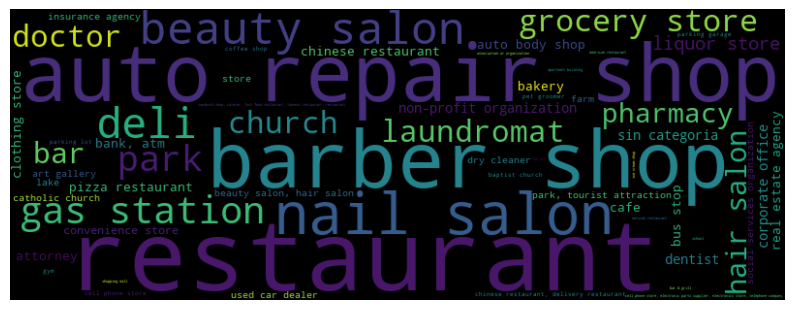

In [46]:
# Cuenta la frecuencia de cada género
frecuencia_genero = comercios_ny['category'].value_counts()
top_10_genero = frecuencia_genero.head(10)

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Oservaciones:**
- El grafico 'Wordcloud' nos permite ver de manera rapida cuales son las categorias con  mas frecuencia resaltando en tamaño, como por ejemplo:'restaurant', 'auto repair shop', 'barber shop', 'nail salon', etc...



---
### **Grafico de barras Top 10 Categorías más Comunes:**


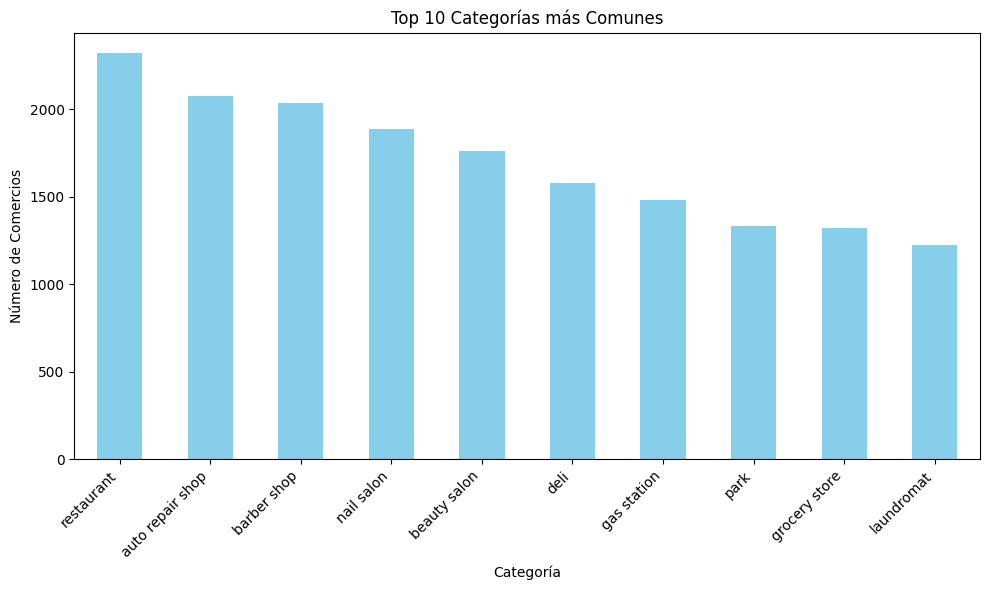


top_10_categorias:
restaurant          2321
auto repair shop    2076
barber shop         2037
nail salon          1885
beauty salon        1761
deli                1578
gas station         1480
park                1336
grocery store       1320
laundromat          1222
Name: category, dtype: int64


In [51]:
# Obtener las 10 categorías más comunes y contar sus ocurrencias
top_10_categorias = comercios_ny['category'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_categorias.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías más Comunes')
plt.xlabel('Categoría')
plt.ylabel('Número de Comercios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.tight_layout()
plt.show()
print(f'\ntop_10_categorias:\n{top_10_categorias}')

**Observaciones:**
- Se genera un grafico con las 10 categorias mas importantes de comercios en el Estado de Nueva York, en el cual se puede observar que la categoria 'restaurant' es la principal.

- Lo que nos permite mayor cantidad de datos que necesitamos para el objetivo que nos planteamos.




---

### **Porcentaje de Categorías con "restaurant" vs Otras Categorías**

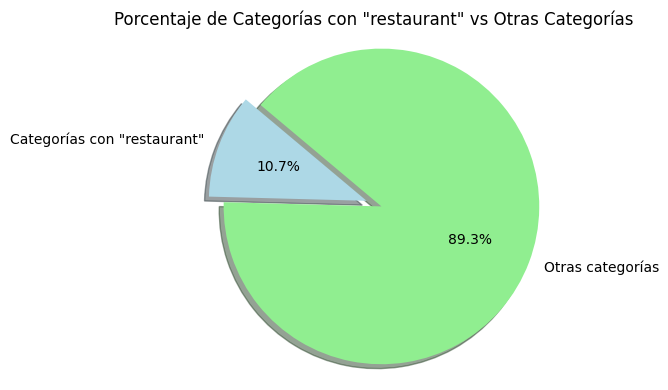


La cantidad de Categorias: 162566
La cantidad de Categorias "Restaurant": 17372
La cantidad de Categorias "No_Restaurant": 145194


In [52]:
# Filtrar el DataFrame para obtener las filas donde la columna 'category' contiene la palabra 'restaurant'
restaurantes = comercios_ny[comercios_ny['category'].str.contains('restaurant', case=False, na=False)]

# Contar las ocurrencias de cada categoría y calcular los porcentajes
total_categorias = len(comercios_ny['category'])
categorias_restaurant = len(restaurantes)
categorias_no_restaurant = total_categorias - categorias_restaurant

porcentaje_restaurant = (categorias_restaurant / total_categorias) * 100
porcentaje_no_restaurant = (categorias_no_restaurant / total_categorias) * 100

# Crear la figura de torta
labels = ['Categorías con "restaurant"', 'Otras categorías']
sizes = [porcentaje_restaurant, porcentaje_no_restaurant]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Porcentaje de Categorías con "restaurant" vs Otras Categorías')
plt.tight_layout()
plt.show()
print(f'\nLa cantidad de Categorias: {total_categorias}')
print(f'La cantidad de Categorias "Restaurant": {categorias_restaurant}')
print(f'La cantidad de Categorias "No_Restaurant": {categorias_no_restaurant}')

**Observaciones:**
- Las categorias 'restaurant' es la mas frecuente y representa un 10% del total de las actividades de comercios, siendo un gran porcentaje, debido a la cantidad de categorias que hay en el estado de Nueva York.



---


### **Restaurantes en el Estado de Nueva York:**

In [47]:
# VIsualizacion General del DataFrame
restaurantes_ny.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17372 entries, 0 to 17461
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               17372 non-null  object 
 1   address            17372 non-null  object 
 2   gmap_id            17372 non-null  object 
 3   latitude           17372 non-null  float64
 4   longitude          17372 non-null  float64
 5   category           17372 non-null  object 
 6   avg_rating         17372 non-null  float64
 7   num_of_reviews     17372 non-null  int64  
 8   price              8641 non-null   object 
 9   hours              15899 non-null  object 
 10  Service options    16919 non-null  object 
 11  Highlights         5045 non-null   object 
 12  Popular for        10541 non-null  object 
 13  Accessibility      8528 non-null   object 
 14  Offerings          13206 non-null  object 
 15  Dining options     9090 non-null   object 
 16  Amenities          12699 no



---
### **Top 10 Restaurantes más Comunes**


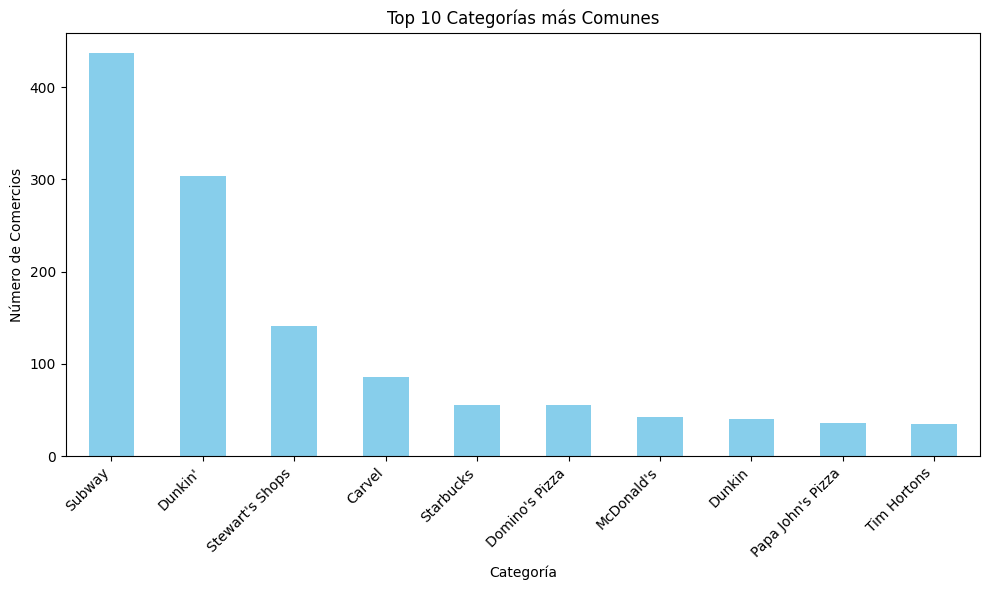


top_10_restaurantes:
Subway               437
Dunkin'              304
Stewart's Shops      141
Carvel                86
Starbucks             56
Domino's Pizza        55
McDonald's            42
Dunkin                40
Papa John's Pizza     36
Tim Hortons           35
Name: name, dtype: int64


In [54]:
# Obtener las 10 categorías más comunes y contar sus ocurrencias
top_10_restaurantes = restaurantes_ny['name'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_restaurantes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Restaurantes más Comunes')
plt.xlabel('Categoría')
plt.ylabel('Número de Comercios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.tight_layout()
plt.show()
print(f'\ntop_10_restaurantes:\n{top_10_restaurantes}')

**Observaciones:**
- En el ranking de los 10 de mayor frecuencia hay un predominio de los 'restaurant' de modalidad 'Fast Food'.
- Decidimos a eligir a Subway debido a su mayor frecuencia entre todos los restaurantes.



---


### **Restaurant Fast Food"  vs "Restaurant No Fast Food**

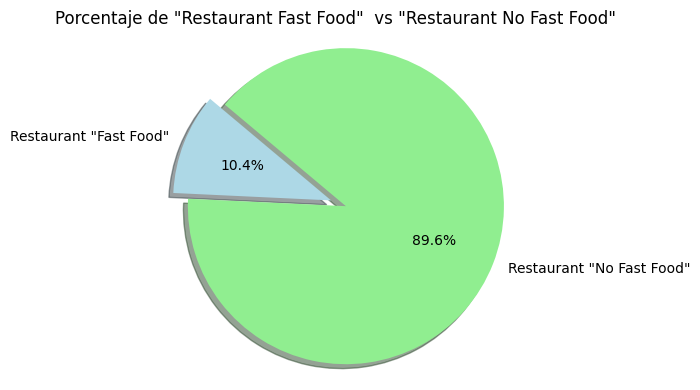


La cantidad de "Restaurant": 17372
La cantidad de "Restaurant" "Fast Food": 1800
La cantidad de "Restaurant" "No Fast Food": 15572

Porcentaje del TOP 10 de Restaurantes Fast Food:
Subway: 433 (24.06%)
Dunkin': 304 (16.89%)
Stewart's Shops: 140 (7.78%)
McDonald's: 42 (2.33%)
SUBWAY®Restaurants: 35 (1.94%)
Dunkin: 33 (1.83%)
Taco Bell: 31 (1.72%)
Burger King: 29 (1.61%)
Chipotle Mexican Grill: 24 (1.33%)
KFC: 20 (1.11%)


In [55]:
# Filtrar el DataFrame para obtener las filas donde la columna 'category' contiene la palabra 'fast food'
fastfood_restaurants = restaurantes_ny[restaurantes_ny['category'].str.contains('fast food', case=False)]

# Contar las ocurrencias de cada categoría y calcular los porcentajes
total_categorias_restaurant = categorias_restaurant
categorias_restaurant_fastfood = len(fastfood_restaurants)
categorias_no_restaurant_fastfood = total_categorias_restaurant - categorias_restaurant_fastfood

porcentaje_restaurant_fastfood = (categorias_restaurant_fastfood / total_categorias_restaurant) * 100
porcentaje_no_restaurant_fastfood = (categorias_no_restaurant_fastfood / total_categorias_restaurant) * 100

# Crear la figura de torta
labels = ['Restaurant "Fast Food"', 'Restaurant "No Fast Food"']
sizes = [porcentaje_restaurant_fastfood, porcentaje_no_restaurant_fastfood]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Porcentaje de "Restaurant Fast Food"  vs "Restaurant No Fast Food" ')
plt.tight_layout()
plt.show()
print(f'\nLa cantidad de "Restaurant": {total_categorias_restaurant}')
print(f'La cantidad de "Restaurant" "Fast Food": {categorias_restaurant_fastfood}')
print(f'La cantidad de "Restaurant" "No Fast Food": {categorias_no_restaurant_fastfood}')
print(f'\nPorcentaje del TOP 10 de Restaurantes Fast Food:')

# Contar el número total de restaurantes de comida rápida
total_fastfood = fastfood_restaurants['name'].value_counts().sum()

# Calcular el porcentaje para cada restaurante de comida rápida
porcentaje_por_restaurante = (fastfood_restaurants['name'].value_counts() / total_fastfood) * 100

# Mostrar los 10 primeros restaurantes de comida rápida junto con sus porcentajes
top_10_fastfood = fastfood_restaurants['name'].value_counts().head(10)
for nombre_restaurante, cantidad in top_10_fastfood.items():
    porcentaje = porcentaje_por_restaurante[nombre_restaurante]
    print(f"{nombre_restaurante}: {cantidad} ({porcentaje:.2f}%)")

**Observaciones:**
- El porcentaje de 'restaurant' de tipo 'Fast Food' tienen un gran numero de frecuencia, similar al que presenta la categoria 'restaurant' con respecto a otras, siendo un porcentaje alto.
- Haciendo un Ranking entre los 'restaurant' de tipo 'Fast Food', 'Subway' predomina en Nueva York, con gran diferencia con respectos a otros teniendo el alto porcentaje aproximadamente de un 26%.



---


## **Guardar el DataFrame:**

In [56]:
# Guardar el DataFrame comprimido en Parquet
restaurantes_ny.to_parquet('restaurantes_ny.parquet')

In [57]:
# Guardar el DataFrame comprimido en Parquet
comercios_ny.to_parquet('comercios_ny.parquet')



---



---

## **Google Maps Review Estados:**

## **Cargar los archivos:**

In [49]:
# Crear desde el  archivo JSON en un DataFrarame
data_folder = 'C:/Users/flore/OneDrive/Desktop/GRUPAL HENRY/google/reviewestados/review-New_York'
file_names_to_read = ['1.json', '2.json', '3.json', '4.json', '5.json', '6.json', '7.json', '8.json', '9.json', '10.json', '11.json', '12.json', '13.json', '14.json', '15.json', '16.json', '17.json', '18.json']
rows = []

for filename in file_names_to_read:
    file_path = os.path.join(data_folder, filename)
    with open(file_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                rows.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {filename}: {e}")

google_review_estados = pd.DataFrame(rows)

Cargamos los datos del Estado de Nueva York, lugar elegido para realizar el analisis.
Lo guardamos en una variable en forma de DataFrame.



---
## **Visualizacion General del DataFrame:**


In [50]:
# Observar el tipo de variable y cantidad de entradas
google_review_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700000 entries, 0 to 2699999
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 164.8+ MB


In [51]:
# Visualizar los 5 primeros resgistros
google_review_estados.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,113722104692308235141,Alvin Martinez,1603494795361,5,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89c25fc9494dce47:0x6d63c807b59a55
1,107293441492109320298,Johnnie Jackson,1620157037403,1,Very dissatisfied I did not get my phone the p...,None,"{'time': 1620268360920, 'text': 'We pride ours...",0x89c25fc9494dce47:0x6d63c807b59a55
2,100378585801819400296,Manie Blazer,1597431662039,5,Excellent very well done with professional car...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55
3,114998161153019826512,Fashion Fiinds,1543773862044,5,Basing my review strictly on the service I rec...,None,"{'time': 1543855317372, 'text': 'Thanks for th...",0x89c25fc9494dce47:0x6d63c807b59a55
4,117178185728422297915,Andres Rieloff,1597279097718,1,Bad! Disorganized. I'm being totally honest. I...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55




---

## **Descripcion de las Columnas:**

- user_id: Identidficador de Usuario unico.
- name: Nombre del usuario.
- time: Tiempo en la App.
- rating: Clasificacion que el Usuario ingresa.
- text: Comentario que realiza el Usuario.
- pics: Foto que sube el Usuario.
- resp: Respuesta al Comentario realizado-
- gmap_id: Identificador Unico del Comercio.



---

## **Cuantificar Valores Nulos:**

In [61]:
# Cantidad total de nulos
total_valores_nulos = google_review_estados.isna().sum().sum()
print(f'Cantidad total de valores Nulos: {total_valores_nulos}')

Cantidad total de valores Nulos: 6197940


In [53]:
# Cantidad total de valores en el DataFrame
total_valores = google_review_estados.size

# Calcular el porcentaje de valores nulos
porcentaje_valores_nulos = (total_valores_nulos / total_valores) * 100

#print(f'Porcentaje de valores Nulos: {porcentaje_valores_nulos:.2f}%')


In [54]:
# Valores Nulos por variable
valores_nulos = google_review_estados.isna().sum()
print(f'Cantidad total de valores Nulos por Columna:\n{valores_nulos}')

Cantidad total de valores Nulos por Columna:
user_id          0
name             0
time             0
rating           0
text       1163593
pics       2598344
resp       2436003
gmap_id          0
dtype: int64


In [55]:
# Cantidad de valores nulos en cada columna
total_valores_nulos = google_review_estados.isna().sum()
# Porcentaje de valores nulos en cada columna
porcentaje_valores_nulos = (total_valores_nulos / len(google_review_estados)) * 100
# Mostrar los porcentajes por columnas
print(porcentaje_valores_nulos)


user_id     0.000000
name        0.000000
time        0.000000
rating      0.000000
text       43.096037
pics       96.234963
resp       90.222333
gmap_id     0.000000
dtype: float64


## **Observaciones:**
- El DataFrame Presenta un 28.69%, es un alto porcentaje, siendo las variables que mas afectan al total son las de : 'pics', 'resp' superando un 90% y 'text' mayor al 40%.
- Estos porcentajes indican que las personas que ingresan a la aplicacion suben muy pocas Fotos, comentan menos de la mitad y hay una baja interaccion de los 'restaurant' en responder a las criticas de los Usuarios.



---


## **Eliminar Columnas:**

In [56]:
# Se modifoca el nombre de las columnas
google_review_estados = google_review_estados.rename(columns={'text': 'text_usuario', 'time': 'time_usuario'})

In [57]:
# Se eliminan las columnas que no seran utilizadas para el analisis
google_review_estados = google_review_estados.drop(columns=['pics'])

**Observaciones:**

- Eliminamos la columna 'pics' y 'time' debido a que no proporcionan informacion relevante para el analisis y poseen valores nulos en la mayoria de sus celdas.

## **Modificacion de las Columnas:**

In [58]:
# Expandir el diccionario en la columna 'MISC' en nuevas columnas
misc_expandido = json_normalize(google_review_estados['resp'])

In [59]:
# Reinicio de indices de ambos DataFrames
google_review_estados.reset_index(drop=True, inplace=True)
misc_expandido.reset_index(drop=True, inplace=True)

# Concatenar las nuevas columnas al DataFrame original
google_review_estados = pd.concat([google_review_estados, misc_expandido], axis=1)

In [60]:
# Eliminar las columnas 'resp', 'time' si ya no la necesitas
google_review_estados.drop(columns=['resp'], inplace=True)

Al igual que la columna 'MISC' del dataframe anterior, la columna 'resp' se encuentra de forma json anidad, por lo que se decide a realizar el mismo tratamiento.
Generar un nuevo dadtaframe, para luego unir por el eje de las columnas y eliminar la columna 'resp' que ya no se de uso.

In [61]:
google_review_estados.head()

,user_id,name,time_usuario,rating,text_usuario,gmap_id,time,text
0,113722104692308235141,Alvin Martinez,1603494795361,5,I'm late to posting this but this store especi...,0x89c25fc9494dce47:0x6d63c807b59a55,NaN,NaN
1,107293441492109320298,Johnnie Jackson,1620157037403,1,Very dissatisfied I did not get my phone the p...,0x89c25fc9494dce47:0x6d63c807b59a55,1.620268e+12,We pride ourselves on providing an awesome exp...
2,100378585801819400296,Manie Blazer,1597431662039,5,Excellent very well done with professional car...,0x89c25fc9494dce47:0x6d63c807b59a55,NaN,NaN
3,114998161153019826512,Fashion Fiinds,1543773862044,5,Basing my review strictly on the service I rec...,0x89c25fc9494dce47:0x6d63c807b59a55,1.543855e+12,Thanks for the awesome review! We work hard t...
4,117178185728422297915,Andres Rieloff,1597279097718,1,Bad! Disorganized. I'm being totally honest. I...,0x89c25fc9494dce47:0x6d63c807b59a55,NaN,NaN




---

## **Valores Duplicados:**

In [62]:
# Contarlos los valores duplicados
duplicados = google_review_estados.duplicated().sum()
print(f'Cantidad de Valores duplicados: {duplicados}')

Cantidad de Valores duplicados: 59337


In [63]:
# Encuentra las filas duplicadas en el DataFrame
filas_duplicadas = google_review_estados[google_review_estados.duplicated(keep=False)]

# Ordena el DataFrame por todas las columnas para que las filas duplicadas estén juntas
filas_duplicadas_ordenadas = filas_duplicadas.sort_values(by=list(filas_duplicadas.columns))

# Imprime todas las filas duplicadas ordenadas
filas_duplicadas_ordenadas.head()

,user_id,name,time_usuario,rating,text_usuario,gmap_id,time,text
1633190,100001343549892652242,Daisy Crawford,1562613047637,5,Close by authentic Chinese food. Place is not ...,0x89d6d09030435d1b:0x66e801f6778ca788,NaN,NaN
1633191,100001343549892652242,Daisy Crawford,1562613047637,5,Close by authentic Chinese food. Place is not ...,0x89d6d09030435d1b:0x66e801f6778ca788,NaN,NaN
1719864,100001436111201072730,Matt Solomon,1502904476201,5,Good customer service,0x89d36e7f288e3d55:0xc7916ace6c856b8c,NaN,NaN
1719873,100001436111201072730,Matt Solomon,1502904476201,5,Good customer service,0x89d36e7f288e3d55:0xc7916ace6c856b8c,NaN,NaN
1067594,100001484139004019148,Anthony Puglisi,1550149671999,4,Great overall market place. Produce is fresh& ...,0x89dd2dd11fb89ceb:0x529da99f9815687a,NaN,NaN


In [64]:
# Eliminar los valores duplicados
google_review_estados = google_review_estados.drop_duplicates()

Observamos una gran cantidad de valores duplicados, los cuales fueron analisasdos con exhustividad para luego proceder a eliminarlos.



---

## **Unificar los Dataframes:**

In [65]:
# Se realiza un Merge por las variables en comun
restaurantes_ny = pd.merge(restaurantes_ny, google_review_estados, on='gmap_id', how='inner')

In [66]:
# Eliminar los valores duplicados
restaurantes_ny = restaurantes_ny.drop_duplicates()

Realizamos la union de ambos DataFrame (restaurantes_ny y google_review_estados) por que de esta manera podemos usar las columnas de ambos y aprovechar al maximo la data para generar un informe mas preciso y de mayor contenido.



---


## **Convertir variable de tiempo:**

In [67]:
# Convertir la columna 'time_usuario' de marcas de tiempo a formato legible
restaurantes_ny['time_usuario'] = pd.to_datetime(restaurantes_ny['time_usuario'], unit='ms')

# Convertir la columna 'time' de marcas de tiempo a formato legible
restaurantes_ny['time'] = pd.to_datetime(restaurantes_ny['time'], unit='ms')

# Imprimir las primeras filas para verificar los cambios
print(restaurantes_ny[['time_usuario', 'time']].head())


             time_usuario time
0 2021-08-16 01:39:58.394  NaT
1 2020-07-01 15:17:58.555  NaT
2 2020-07-07 19:42:23.631  NaT
3 2019-08-02 20:05:40.103  NaT
4 2020-10-11 15:14:31.233  NaT


**Observaciones:**
- El valor de 'time_usuario'y 'time' es una marca de tiempo en milisegundos. Las marcas de tiempo, en su forma más común, representan la cantidad de tiempo transcurrido desde un punto de referencia específico, generalmente la "época" o "epoch".

- La "época" es un momento específico en el tiempo que se utiliza como punto de referencia para las marcas de tiempo. En muchos sistemas informáticos y bases de datos, la "época" se define como el comienzo del 1 de enero de 1970 (UTC), conocido como "época Unix". Las marcas de tiempo se cuentan en segundos o milisegundos desde este punto.




---
## **Analisis General de los DataFrame combinados:**


In [68]:
# Reiniciar el indice
restaurantes_ny = restaurantes_ny.reset_index(drop=True)

In [69]:
restaurantes_ny.to_csv('newyorksent.csv', index=False)


In [70]:
# Observar el tipo de variable y cantidad de entradas
restaurantes_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742908 entries, 0 to 742907
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   name_x             742908 non-null  object        
 1   address            742908 non-null  object        
 2   gmap_id            742908 non-null  object        
 3   latitude           742908 non-null  float64       
 4   longitude          742908 non-null  float64       
 5   category           742908 non-null  object        
 6   avg_rating         742908 non-null  float64       
 7   num_of_reviews     742908 non-null  int64         
 8   price              573034 non-null  object        
 9   hours              720888 non-null  object        
 10  Service options    727843 non-null  object        
 11  Highlights         390071 non-null  object        
 12  Popular for        568367 non-null  object        
 13  Accessibility      550355 non-null  object  

In [79]:
# Visualizar los 5 primeros resgistros
restaurantes_ny.head()

,name_x,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,Service options,Highlights,Popular for,Accessibility,Offerings,Dining options,Amenities,Atmosphere,Crowd,Payments,Planning,Health & safety,From the business,Health and safety,user_id,name_y,time_usuario,rating,text_usuario,time,text
0,Dunkin',"Dunkin', 4008 Bell Blvd, Queens, NY 11361",0x89c261f60bdf13db:0x38da730e4687a97b,40.763985,-73.77143,"coffee shop, bagel shop, bakery, breakfast res...",3.5,8,$,"Thursday 6AM–7PM, Friday 6AM–7PM, Saturday 6AM...","Delivery, Takeout, Dine-in","Fast service, Great coffee","Breakfast, Solo dining",Wheelchair accessible entrance,"Coffee, Comfort food, Happy hour drinks, Late-...","Breakfast, Lunch, Dessert","Good for kids, Wi-Fi",Casual,"Family-friendly, Tourists","Debit cards, NFC mobile payments",NaN,NaN,NaN,NaN,101863461389011299215,Maria Patricia Londoño,2021-08-16 01:39:58.394,4,The donuts is always a good place to buy somet...,NaT,NaN
1,Dunkin',"Dunkin', 4008 Bell Blvd, Queens, NY 11361",0x89c261f60bdf13db:0x38da730e4687a97b,40.763985,-73.77143,"coffee shop, bagel shop, bakery, breakfast res...",3.5,8,$,"Thursday 6AM–7PM, Friday 6AM–7PM, Saturday 6AM...","Delivery, Takeout, Dine-in","Fast service, Great coffee","Breakfast, Solo dining",Wheelchair accessible entrance,"Coffee, Comfort food, Happy hour drinks, Late-...","Breakfast, Lunch, Dessert","Good for kids, Wi-Fi",Casual,"Family-friendly, Tourists","Debit cards, NFC mobile payments",NaN,NaN,NaN,NaN,101954633332535852944,Kristal,2020-07-01 15:17:58.555,5,I went into this Dunkin' yesterday and got som...,NaT,NaN
2,Dunkin',"Dunkin', 4008 Bell Blvd, Queens, NY 11361",0x89c261f60bdf13db:0x38da730e4687a97b,40.763985,-73.77143,"coffee shop, bagel shop, bakery, breakfast res...",3.5,8,$,"Thursday 6AM–7PM, Friday 6AM–7PM, Saturday 6AM...","Delivery, Takeout, Dine-in","Fast service, Great coffee","Breakfast, Solo dining",Wheelchair accessible entrance,"Coffee, Comfort food, Happy hour drinks, Late-...","Breakfast, Lunch, Dessert","Good for kids, Wi-Fi",Casual,"Family-friendly, Tourists","Debit cards, NFC mobile payments",NaN,NaN,NaN,NaN,108987684095941070060,Efrain Hernandez,2020-07-07 19:42:23.631,3,Bought a Machiato and as soon as I touched the...,NaT,NaN
3,Dunkin',"Dunkin', 4008 Bell Blvd, Queens, NY 11361",0x89c261f60bdf13db:0x38da730e4687a97b,40.763985,-73.77143,"coffee shop, bagel shop, bakery, breakfast res...",3.5,8,$,"Thursday 6AM–7PM, Friday 6AM–7PM, Saturday 6AM...","Delivery, Takeout, Dine-in","Fast service, Great coffee","Breakfast, Solo dining",Wheelchair accessible entrance,"Coffee, Comfort food, Happy hour drinks, Late-...","Breakfast, Lunch, Dessert","Good for kids, Wi-Fi",Casual,"Family-friendly, Tourists","Debit cards, NFC mobile payments",NaN,NaN,NaN,NaN,110146321170975563919,Kiyoshi Sudo,2019-08-02 20:05:40.103,5,"Friendly staffs, nice donuts and muffins and c...",NaT,NaN
4,Dunkin',"Dunkin', 4008 Bell Blvd, Queens, NY 11361",0x89c261f60bdf13db:0x38da730e4687a97b,40.763985,-73.77143,"coffee shop, bagel shop, bakery, breakfast res...",3.5,8,$,"Thursday 6AM–7PM, Friday 6AM–7PM, Saturday 6AM...","Delivery, Takeout, Dine-in","Fast service, Great coffee","Breakfast, Solo dining",Wheelchair accessible entrance,"Coffee, Comfort food, Happy hour drinks, Late-...","Breakfast, Lunch, Dessert","Good for kids, Wi-Fi",Casual,"Family-friendly, Tourists","Debit cards, NFC mobile payments",NaN,NaN,NaN,NaN,112625885159369009229,Charlotte Sheppard,2020-10-11 15:14:31.233,1,They got my order wrong food wasn't done unco...,NaT,NaN




---

## **Periodo de los Comentarios:**

Al generar un periodo de tiempo nos permite ubicarnos y ponernos en contexto de los datos que poseemos.

In [80]:
# Extraer el año de la columna 'time' en el DataFrame 'restaurantes_ny'
restaurantes_ny['year'] = restaurantes_ny['time_usuario'].dt.year
# Imprimir el DataFrame con la nueva columna 'year'
restaurantes_ny[['time_usuario', 'year']].head()

,time_usuario,year
0,2021-08-16 01:39:58.394,2021
1,2020-07-01 15:17:58.555,2020
2,2020-07-07 19:42:23.631,2020
3,2019-08-02 20:05:40.103,2019
4,2020-10-11 15:14:31.233,2020


In [81]:
# Convertir la columna 'Year' en INT
restaurantes_ny['year'] = restaurantes_ny['year'].astype('Int64')

In [82]:
# Calcular el valor mínimo en la Serie
año_maximo = restaurantes_ny['year'].max()
# Calcular el valor mínimo en la Serie
año_minimo = restaurantes_ny['year'].min()

print(f'"Año_maximo" {año_maximo}')
print(f'"Año_Minimo": {año_minimo}')
print(f'El periodo que en que se realizaron los comentarios corresponde entre : {año_minimo} y {año_maximo}')

"Año_maximo" 2021
"Año_Minimo": 1990
El periodo que en que se realizaron los comentarios corresponde entre : 1990 y 1990


Podemos ver que a traves de los datos , tenemos un periodo prolongado, de 31 años. lo cual nos puede brindar informacion valiosa en cueanto al comportamiento de los interactuantes.

In [83]:
restaurantes_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742908 entries, 0 to 742907
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   name_x             742908 non-null  object        
 1   address            742908 non-null  object        
 2   gmap_id            742908 non-null  object        
 3   latitude           742908 non-null  float64       
 4   longitude          742908 non-null  float64       
 5   category           742908 non-null  object        
 6   avg_rating         742908 non-null  float64       
 7   num_of_reviews     742908 non-null  int64         
 8   price              573034 non-null  object        
 9   hours              720888 non-null  object        
 10  Service options    727843 non-null  object        
 11  Highlights         390071 non-null  object        
 12  Popular for        568367 non-null  object        
 13  Accessibility      550355 non-null  object  



---
### **Reseñas y Comentarios realizados por Usuarios en Nueva York:**


Decidimos generar tres variables: una destinada al total de restaurantes, otra con el total de datos correspondientes a 'restaurantes Fast Food', que son la compentecia del que eligimos como objeto de analisis y nos brinda informacion importante. Por ultimo la variable 'restaurante Subway', el elegido para el analisis.

### **Total de Reseñas del Total de Restaurantes:**

In [84]:
# Crea una variable con el total de personas que dejaron una calificacion del local
total_reseñas = restaurantes_ny['text_usuario'].count()

# Se crea variable con clientes que no inresaron comentarios
total_reseñas_sin_comentarios = restaurantes_ny['text_usuario'].isna().sum()

# Se crea variable con clientes que inresaron comentarios
total_reseñas_con_comentarios = total_reseñas - total_reseñas_sin_comentarios


### **Total de Reseñas del Total de Restaurantes Fast Food:**

In [85]:
# Filtrar el DataFrame para obtener las filas donde la columna 'category' contiene la palabra 'fast food'
fastfood_restaurants_reseñas = restaurantes_ny[restaurantes_ny['category'].str.contains('fast food', case=False)]
total_fastfood_restaurants_reseñas = fastfood_restaurants_reseñas[fastfood_restaurants_reseñas['category'].str.contains('fast food', case=False)].shape[0]

# Se crea variable con clientes que no inresaron comentarios
total_fastfood_restaurants_sin_comentarios = fastfood_restaurants_reseñas['text_usuario'].isna().sum()

# Se crea variable con clientes que inresaron comentarios
total_fastfood_restaurants_con_comentarios = total_reseñas - total_reseñas_sin_comentarios


### **Total de Reseñas de Subway:**

In [86]:
# Filtrar el DataFrame para obtener las filas donde la columna 'name_x' contiene la palabra 'subway'
subway_reseñas = restaurantes_ny[restaurantes_ny['name_x'].str.contains('subway', case=False)]
total_subway_reseñas = subway_reseñas[subway_reseñas['name_x'].str.contains('subway', case=False)].shape[0]

# Se crea variable con clientes que no inresaron comentarios
total_total_subway_reseñas_sin_comentarios = subway_reseñas['text_usuario'].isna().sum()

# Se crea variable con clientes que inresaron comentarios
total_total_subway_reseñas_con_comentarios = total_reseñas - total_reseñas_sin_comentarios




---



---



### **Porcentaje de Comentarios de Fast Food y Subway con respecto al total de Reseñas**

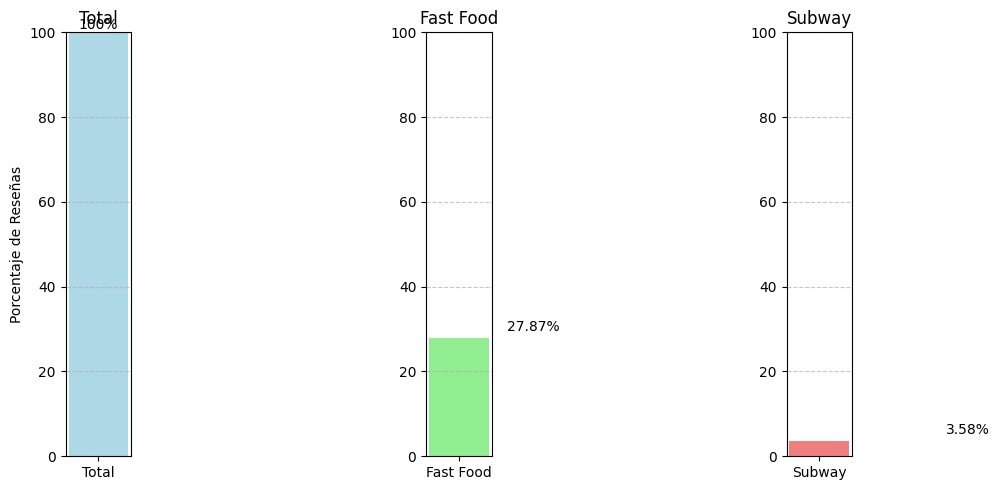

In [87]:
# Calcular porcentajes
porcentaje_reseñas_fastfood = total_fastfood_restaurants_reseñas / total_reseñas * 100
porcentaje_reseñas_subway = total_subway_reseñas / total_reseñas * 100

# Crear datos para los subgráficos
categorias = ['Total', 'Fast Food', 'Subway']
porcentajes = [100, porcentaje_reseñas_fastfood, porcentaje_reseñas_subway]

# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico para Total
axs[0].bar('Total', 100, color='lightblue')
axs[0].set_ylabel('Porcentaje de Reseñas')
axs[0].set_title('Total')
axs[0].set_ylim(0, 100)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)


# Gráfico para Fast Food
axs[1].bar('Fast Food', porcentaje_reseñas_fastfood, color='lightgreen')
axs[1].set_title('Fast Food')
axs[1].set_ylim(0, 100)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].text(1, porcentaje_reseñas_fastfood + 1, f'{porcentaje_reseñas_fastfood:.2f}%', ha='center', va='bottom')
axs[0].text(0, 100, '100%', ha='center', va='bottom')

# Gráfico para Subway
axs[2].bar('Subway', porcentaje_reseñas_subway, color='lightcoral')
axs[2].set_title('Subway')
axs[2].set_ylim(0, 100)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
axs[2].text(2, porcentaje_reseñas_subway + 1, f'{porcentaje_reseñas_subway:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



**Observaciones:**
- Teniendo en cuenta la gran cantidad de categorias, los Fast Food generan una buena proporcion de comentarios.

- Esto nos da una idea del comportamiento de los clientes en estos establecimientos, debido a la cantidad que hay se podria mejorar el la cantidad de interaccion del cliente.

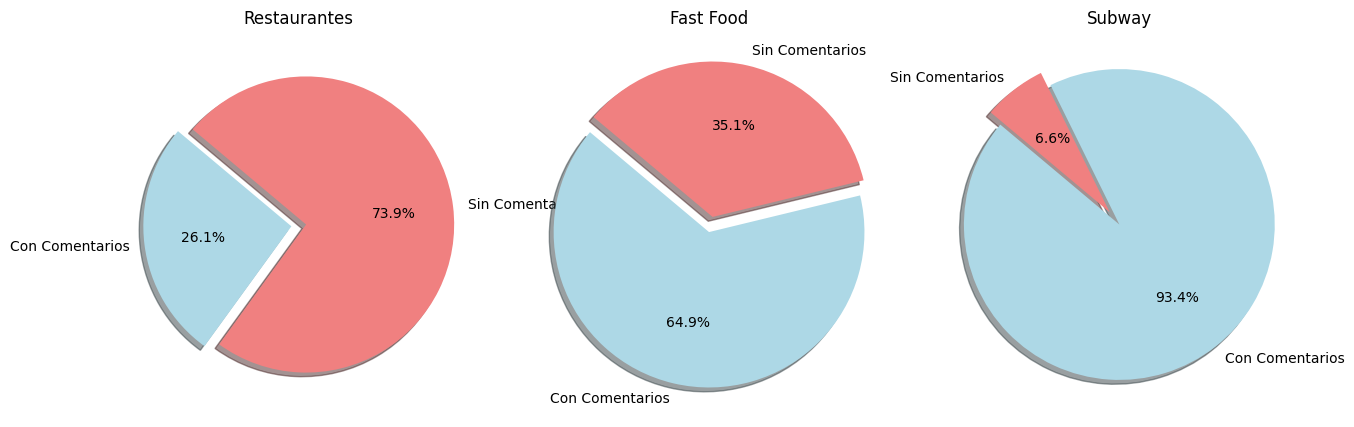


Restaurantes
Cantidad de Reseñas: 427268
Cantidad de Reseñas sin comentarios: 315640
Cantidad de Reseñas con comentarios: 111628

Fast Food
Cantidad de Reseñas: 119091
Cantidad de Reseñas sin comentarios: 60374
Cantidad de Reseñas con comentarios: 111628

Subway
Cantidad de Reseñas: 15293
Cantidad de Reseñas sin comentarios: 7871
Cantidad de Reseñas con comentarios: 111628


In [88]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico para Restaurantes
labels = ['Con Comentarios', 'Sin Comentarios']
sizes = [total_reseñas_con_comentarios, total_reseñas_sin_comentarios]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Separación de las secciones

axs[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0].axis('equal')  # Asegurar que la torta sea circular
axs[0].set_title('Restaurantes')

# Gráfico para Restaurantes Fast Food
labels = ['Con Comentarios', 'Sin Comentarios']
sizes = [total_fastfood_restaurants_con_comentarios, total_fastfood_restaurants_sin_comentarios]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Separación de las secciones

axs[1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].axis('equal')  # Asegurar que la torta sea circular
axs[1].set_title('Fast Food')

# Gráfico para Restaurantes Subway
labels = ['Con Comentarios', 'Sin Comentarios']
sizes = [total_total_subway_reseñas_con_comentarios, total_total_subway_reseñas_sin_comentarios]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Separación de las secciones

axs[2].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[2].axis('equal')  # Asegurar que la torta sea circular
axs[2].set_title('Subway')

plt.show()

print(f'\nRestaurantes')
print(f'Cantidad de Reseñas: {total_reseñas}')
print(f'Cantidad de Reseñas sin comentarios: {total_reseñas_sin_comentarios}')
print(f'Cantidad de Reseñas con comentarios: {total_reseñas_con_comentarios}')

print(f'\nFast Food')
print(f'Cantidad de Reseñas: {total_fastfood_restaurants_reseñas}')
print(f'Cantidad de Reseñas sin comentarios: {total_fastfood_restaurants_sin_comentarios}')
print(f'Cantidad de Reseñas con comentarios: {total_fastfood_restaurants_con_comentarios}')

print(f'\nSubway')
print(f'Cantidad de Reseñas: {total_subway_reseñas}')
print(f'Cantidad de Reseñas sin comentarios: {total_total_subway_reseñas_sin_comentarios}')
print(f'Cantidad de Reseñas con comentarios: {total_total_subway_reseñas_con_comentarios}')


**Observaciones:**
- Los restaurantes en general en la ciudad de Nueva York presentan un buen porcentaje de clientes que comenta, siendo un tercio del total. Con esto inferimos que gran cantidd de personas comentan y briandan informacion para mejoras de los establecimientos y datos para los otros usuarios.
- La proporcion de los Fast Food, es menor que la anterior, teniendo una gran cantidad de reseñas. Esto nos brinda una posibilidad de mejora.

- En cuanto a Subway la proporcion es casi optima, con un valor muy elevado, lo que significa que la mayoria de personas que ingresa al establecimiento genera informacion no solo con reseña, sino que tambien comenta.





---



---



### **Evolución de la Cantidad de Comentarios por Año**

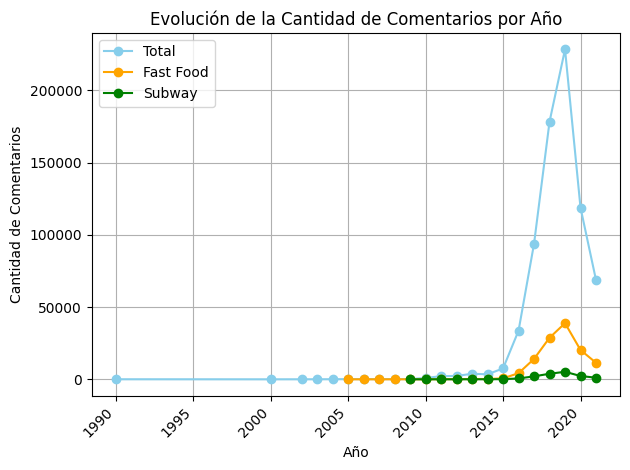

In [89]:
# Contar la cantidad de comentarios por año
comentarios_restaurantes_por_año = restaurantes_ny.groupby('year').size()
comentarios_fastfood_restaurants_reseñas_por_año = fastfood_restaurants_reseñas.groupby('year').size()
comentarios_subway_reseñas_por_año = subway_reseñas.groupby('year').size()

# Graficar los datos para cada tipo de restaurante
comentarios_restaurantes_por_año.plot(color='skyblue', marker='o', linestyle='-', label='Total')
comentarios_fastfood_restaurants_reseñas_por_año.plot(color='orange', marker='o', linestyle='-', label='Fast Food')
comentarios_subway_reseñas_por_año.plot(color='green', marker='o', linestyle='-', label='Subway')

# Etiquetas y título
plt.title('Evolución de la Cantidad de Comentarios por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Comentarios')

# Leyenda
plt.legend()

# Personalización de los ejes
plt.xticks(rotation=45, ha='right')
plt.grid(True)  # Agregar rejilla al gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**Observaciones:**
- El grafico nos permite inferir que a medida que aumentaron los Años, con los avances de la tecnolgia y la interaccion de los usuarios con app que los coenctan con los establecimientos, se produjo un gran aumento entre el periodo del 2008 y 2020 de manera similar en las tres variables, teniendo en cuenta su proporcion. En el ultimo año se observa una caida brusca, debido al confinamiento por causa de la Pandemia producida por el COVID-19.



---

### **Descripcion Estadistica de los Años y cantidad de reseñas:**

In [90]:
# Descricion del total de restaurantes
restaurantes_ny['year'].describe()
print(restaurantes_ny['year'].describe())
print(f'\nCantidad de comentarios por Ano: {restaurantes_ny["year"].value_counts()}')

count       742908.0
mean     2018.548686
std         1.616118
min           1990.0
25%           2018.0
50%           2019.0
75%           2020.0
max           2021.0
Name: year, dtype: Float64

Cantidad de comentarios por Ano: 2019    228346
2018    178264
2020    118786
2017     93847
2021     68771
2016     33677
2015      7544
2013      3841
2014      3464
2012      2329
2011      2186
2010       924
2009       190
2008       177
2006       160
2007       139
2005       116
2004        62
1990        34
2003        29
2002        21
2000         1
Name: year, dtype: Int64


**Observaciones:**

- La media del año de reseñas es aproximadamente 2018.55.

- El rango de años va desde 1990 hasta 2021, lo que sugiere una amplia variedad en la antigüedad de los restaurantes en la región.

- El 25% de las reseñas de restaurantes se producen en 2018 o antes, mientras que el 75% se establecieron en 2020 o antes, lo que indica una concentración relativamente alta de establecimientos más recientes.

- El año con más reseñas parece ser 2019, ya que es el año en el que se encuentra la mediana (50% de las reseñas en 2019 o antes).

- La distribución  sugiere una cierta tendencia hacia la mayor generacion de reseñas en los últimos años, especialmente alrededor de 2018 y 2019.




In [91]:
# Descricion del total de restaurantes Fast Food
print(fastfood_restaurants_reseñas['year'].describe())
print(f'\nCantidad de comentarios por Ano: {fastfood_restaurants_reseñas["year"].value_counts()}')

count       119091.0
mean     2018.717166
std         1.361621
min           2005.0
25%           2018.0
50%           2019.0
75%           2020.0
max           2021.0
Name: year, dtype: Float64

Cantidad de comentarios por Ano: 2019    38852
2018    28758
2020    20300
2017    14134
2021    11445
2016     4234
2015      682
2014      211
2013      209
2012      121
2011       94
2010       28
2009       10
2008        7
2005        3
2006        2
2007        1
Name: year, dtype: Int64


In [92]:
# Descricion del total de restaurantes Subway
print(subway_reseñas['year'].describe())
print(f'\nCantidad de comentarios por Ano: {subway_reseñas["year"].value_counts()}')

count        15293.0
mean     2018.589355
std         1.339971
min           2009.0
25%           2018.0
50%           2019.0
75%           2019.0
max           2021.0
Name: year, dtype: Float64

Cantidad de comentarios por Ano: 2019    5203
2018    3841
2020    2285
2017    2051
2021    1113
2016     582
2015     118
2014      34
2013      30
2011      17
2012      14
2010       4
2009       1
Name: year, dtype: Int64




---
### **Grafico de Caja para detallar los 'Outliers':**


<ipython-input-93-60d1a9734154>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastfood_restaurants_reseñas['year'] = fastfood_restaurants_reseñas['year'].astype('Int64')
<ipython-input-93-60d1a9734154>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_reseñas['year'] = subway_reseñas['year'].astype('Int64')


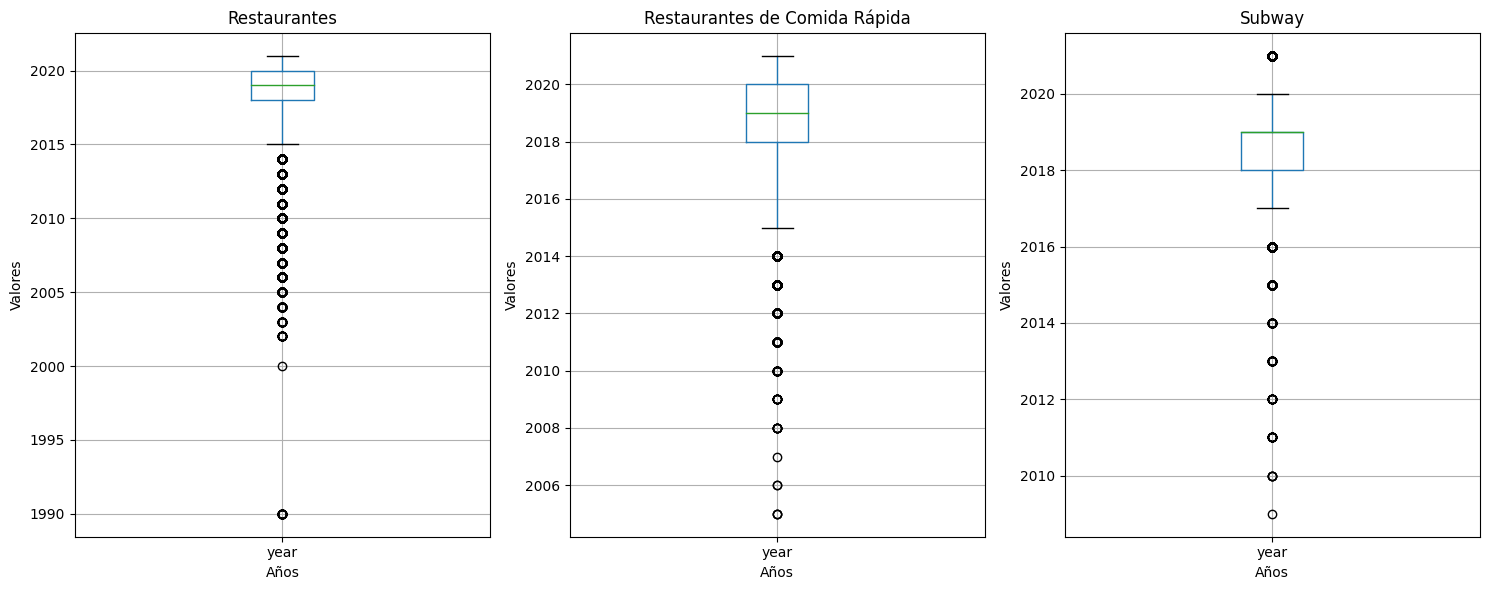

In [93]:
# Convertir la columna 'year' a tipo 'Int64' si no lo está
restaurantes_ny['year'] = restaurantes_ny['year'].astype('Int64')

# Convertir la columna 'year' a tipo 'Int64' si no lo está
fastfood_restaurants_reseñas['year'] = fastfood_restaurants_reseñas['year'].astype('Int64')

# Convertir la columna 'year' a tipo 'Int64' si no lo está
subway_reseñas['year'] = subway_reseñas['year'].astype('Int64')

# Crear el gráfico de boxplots
plt.figure(figsize=(15, 6))

# Boxplot para restaurantes_ny
plt.subplot(1, 3, 1)
restaurantes_ny.boxplot(column='year')
plt.title('Restaurantes')
plt.xlabel('Años')
plt.ylabel('Valores')
plt.grid(True)

# Boxplot para fastfood_restaurants_reseñas
plt.subplot(1, 3, 2)
fastfood_restaurants_reseñas.boxplot(column='year')
plt.title('Restaurantes de Comida Rápida')
plt.xlabel('Años')
plt.ylabel('Valores')
plt.grid(True)

# Boxplot para subway_reseñas
plt.subplot(1, 3, 3)
subway_reseñas.boxplot(column='year')
plt.title('Subway')
plt.xlabel('Años')
plt.ylabel('Valores')
plt.grid(True)

plt.tight_layout()
plt.show()


**Observaciones:**

- En el primer grafico de restaurantes se puede observar una caja simetrica, en donde la mediana se ubica aproximadamente entre los años 2019 y la mayor concentracion de los datos entre 2018 y 2020. Se puede observar la presencia de Outliers, entre 1990 y 2014.

- En el segundo grafico de Fast Food se puede observar una caja simetrica, en donde la mediana se ubica aproximadamente entre los años 2019 y la mayor concentracion de los datos entre 2018 y 2020. Se puede observar la presencia de Outliers, entre 2004 y 2014.

- En el tercer grafico de Fast Food se puede observar una caja asimetrica, presenta un sesgo negativo, hacia la izquierda en donde la mediana se ubica aproximadamente en los años 2019 y es muy similar al tercer cuartil. La concentracion de los datos entre 2018 y 2019. Se puede observar la presencia de Outliers, entre 2008 y 2016, tambien se observan Outliers mayores al año 2020.



---
### **Promedio de Clasificaciones:**


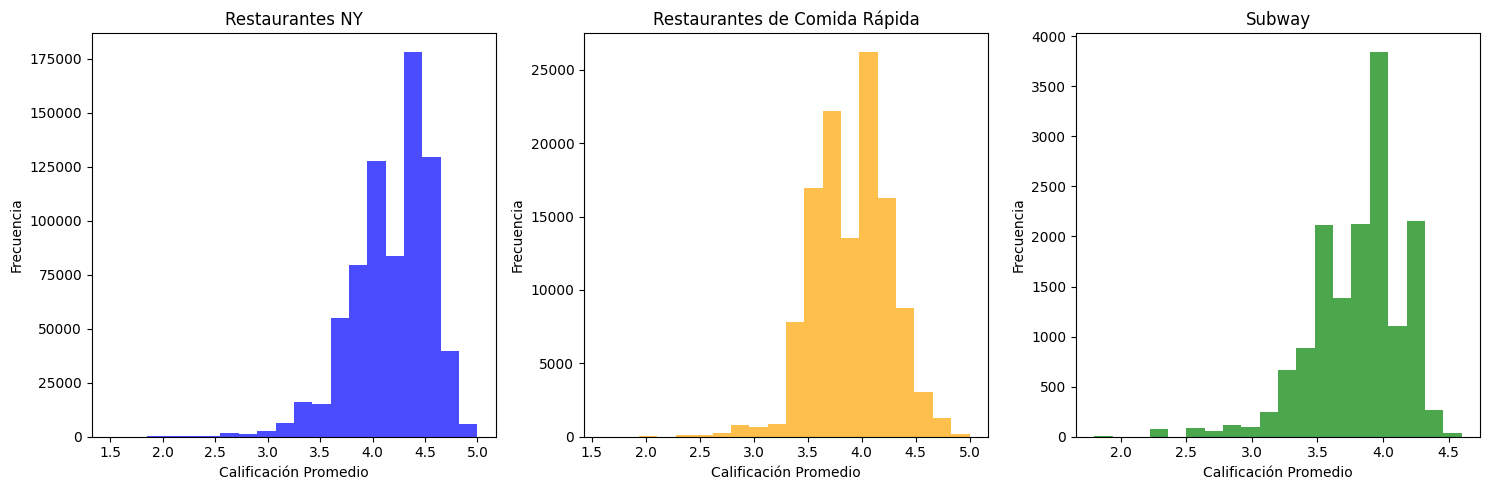


Descripcion Estadistica de Restaurantes:
count    742908.000000
mean          4.172728
std           0.372295
min           1.500000
25%           4.000000
50%           4.200000
75%           4.400000
max           5.000000
Name: avg_rating, dtype: float64

Descripcion Estadistica de Restaurantes Fast Food:
count    119091.000000
mean          3.904847
std           0.346807
min           1.600000
25%           3.700000
50%           3.900000
75%           4.100000
max           5.000000
Name: avg_rating, dtype: float64

Descripcion Estadistica de Restaurantes Subway:
count    15293.000000
mean         3.797973
std          0.353732
min          1.800000
25%          3.600000
50%          3.800000
75%          4.000000
max          4.600000
Name: avg_rating, dtype: float64


In [107]:
# Variables con los valores Rating
datos_ny = restaurantes_ny['avg_rating']
datos_fastfood = fastfood_restaurants_reseñas['avg_rating']
datos_subway = subway_reseñas['avg_rating']

# Crear tres subgráficos uno al lado del otro
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histograma para restaurantes en Nueva York
axes[0].hist(datos_ny, bins=20, color='blue', alpha=0.7)
axes[0].set_title('Restaurantes NY')
axes[0].set_xlabel('Calificación Promedio')
axes[0].set_ylabel('Frecuencia')

# Histograma para restaurantes de comida rápida
axes[1].hist(datos_fastfood, bins=20, color='orange', alpha=0.7)
axes[1].set_title('Restaurantes de Comida Rápida')
axes[1].set_xlabel('Calificación Promedio')
axes[1].set_ylabel('Frecuencia')

# Histograma para Subway
axes[2].hist(datos_subway, bins=20, color='green', alpha=0.7)
axes[2].set_title('Subway')
axes[2].set_xlabel('Calificación Promedio')
axes[2].set_ylabel('Frecuencia')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

print(f'\nDescripcion Estadistica de Restaurantes:\n{restaurantes_ny["avg_rating"].describe()}')
print(f'\nDescripcion Estadistica de Restaurantes Fast Food:\n{fastfood_restaurants_reseñas["avg_rating"].describe()}')
print(f'\nDescripcion Estadistica de Restaurantes Subway:\n{subway_reseñas["avg_rating"].describe()}')

**Observaciones:**

- Restaurantes Generales:

La media del promedio de rating para restaurantes generales es de aproximadamente 4.17, con una desviación estándar de 0.37. Esto indica que, en promedio, estos restaurantes son bien valorados por los clientes, con una variabilidad moderada en los ratings.
La mediana es de 4.2, lo que sugiere que la mitad de los restaurantes tienen un rating igual o superior a este valor.
La distribución de los ratings se encuentra en un rango amplio, desde 1.5 hasta 5.0, lo que indica una diversidad en las experiencias de los clientes.

- Restaurantes de Comida Rápida:

Los restaurantes de comida rápida tienen una media del promedio de rating de aproximadamente 3.90, con una desviación estándar de 0.35. Esto sugiere que, en promedio, estos restaurantes son valorados ligeramente menos que los restaurantes generales, con una menor variabilidad en los ratings.
La mediana es de 3.9, indicando que la mitad de los restaurantes de comida rápida tienen un rating igual o inferior a este valor.
El rango de ratings va desde 1.6 hasta 5.0, mostrando una amplia gama de experiencias de los clientes, aunque en promedio son ligeramente inferiores a los restaurantes generales.

- Restaurantes Subway:

Para los restaurantes Subway, la media del promedio de rating es de aproximadamente 3.80, con una desviación estándar de 0.35. Esto sugiere que estos restaurantes tienen una valoración similar a los de comida rápida, con una variabilidad similar en los ratings.
La mediana es de 3.8, indicando que la mitad de los restaurantes Subway tienen un rating igual o inferior a este valor.
El rango de ratings va desde 1.8 hasta 4.6, mostrando una menor dispersión en comparación con los restaurantes generales y de comida rápida.




---


## **Calificación Promedio por Año y Tipo de Restaurante (Años Comunes)**

In [111]:
# Agrupar por año y calcular la calificación promedio
calificacion_promedio_por_año_estaurantes = restaurantes_ny.groupby('year')['avg_rating'].mean()
calificacion_promedio_por_año_fastfood = fastfood_restaurants_reseñas.groupby('year')['avg_rating'].mean()
calificacion_promedio_por_año_subway = subway_reseñas.groupby('year')['avg_rating'].mean()

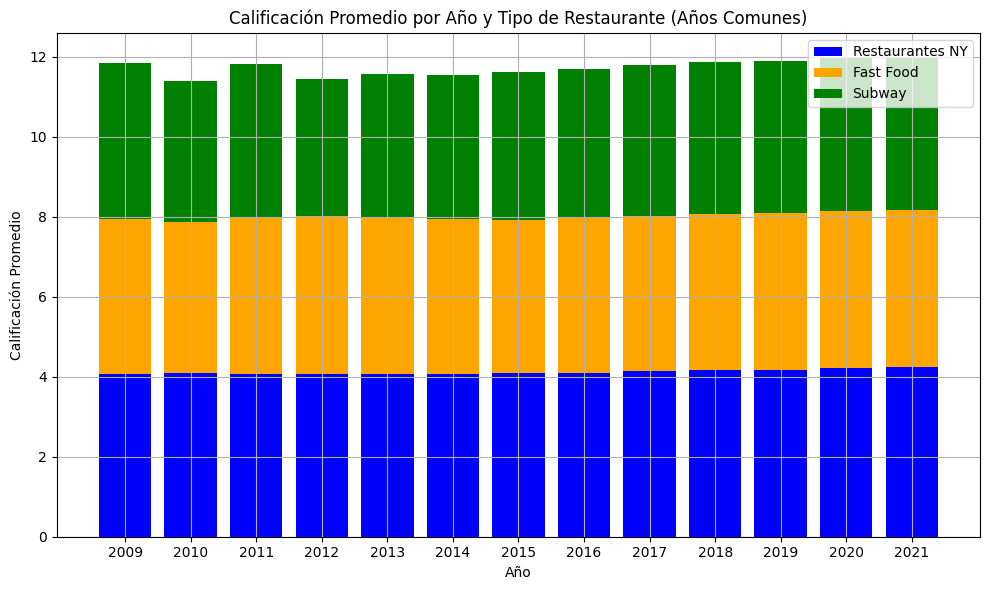

In [115]:
# Agrupar por año y calcular la calificación promedio
calificacion_promedio_por_año_estaurantes = restaurantes_ny.groupby('year')['avg_rating'].mean()
calificacion_promedio_por_año_fastfood = fastfood_restaurants_reseñas.groupby('year')['avg_rating'].mean()
calificacion_promedio_por_año_subway = subway_reseñas.groupby('year')['avg_rating'].mean()

# Obtener los años que están presentes en todos los conjuntos de datos
años_comunes = set(calificacion_promedio_por_año_estaurantes.index) & set(calificacion_promedio_por_año_fastfood.index) & set(calificacion_promedio_por_año_subway.index)

# Convertir los años comunes a una lista para mantener el orden
años_comunes = list(años_comunes)

# Filtrar los datos de calificación promedio por año para los años comunes
calificacion_promedio_ny_comunes = [calificacion_promedio_por_año_estaurantes[year] for year in años_comunes]
calificacion_promedio_fastfood_comunes = [calificacion_promedio_por_año_fastfood[year] for year in años_comunes]
calificacion_promedio_subway_comunes = [calificacion_promedio_por_año_subway[year] for year in años_comunes]

# Crear el gráfico de columnas apiladas
plt.figure(figsize=(10, 6))

# Plotear las calificaciones promedio por año para cada tipo de restaurante
plt.bar(años_comunes, calificacion_promedio_ny_comunes, label='Restaurantes NY', color='blue')
plt.bar(años_comunes, calificacion_promedio_fastfood_comunes, bottom=calificacion_promedio_ny_comunes, label='Fast Food', color='orange')
plt.bar(años_comunes, calificacion_promedio_subway_comunes, bottom=[sum(x) for x in zip(calificacion_promedio_ny_comunes, calificacion_promedio_fastfood_comunes)], label='Subway', color='green')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Año y Tipo de Restaurante (Años Comunes)')
plt.xticks(años_comunes)  # Mostrar solo los años comunes en el eje x
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


**Observaciones:**
- Se puede observar que entre los años 2009 y 2021 entre las tres variables, el comportamiento de los clientes es similar. Se mantiene constanate en los años y el valor de la calificacion.
A excepcion del entre el año 2009 y 2012 de las calificaciones de Subway hay una fluctuacion en menores las calificaciones.



---



---

